In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("weather_data_500_rows.csv")

In [3]:
df['Date'] = pd.to_datetime(df['Date'])


In [4]:
print("Basic Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                500 non-null    datetime64[ns]
 1   Location            500 non-null    object        
 2   Temperature (C)     500 non-null    float64       
 3   Humidity (%)        500 non-null    int64         
 4   Precipitation (mm)  500 non-null    float64       
 5   Wind Speed (km/h)   500 non-null    float64       
 6   Weather Condition   500 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 27.5+ KB
None

Summary Statistics:
                      Date  Temperature (C)  Humidity (%)  Precipitation (mm)  \
count                  500       500.000000    500.000000          500.000000   
mean   2024-09-06 12:00:00        14.549000     58.848000           25.361800   
min    2024-01-01 00:00:00   

In [5]:
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Date                  0
Location              0
Temperature (C)       0
Humidity (%)          0
Precipitation (mm)    0
Wind Speed (km/h)     0
Weather Condition     0
dtype: int64


In [6]:
print("\nColumn Names:", df.columns.tolist())


Column Names: ['Date', 'Location', 'Temperature (C)', 'Humidity (%)', 'Precipitation (mm)', 'Wind Speed (km/h)', 'Weather Condition']


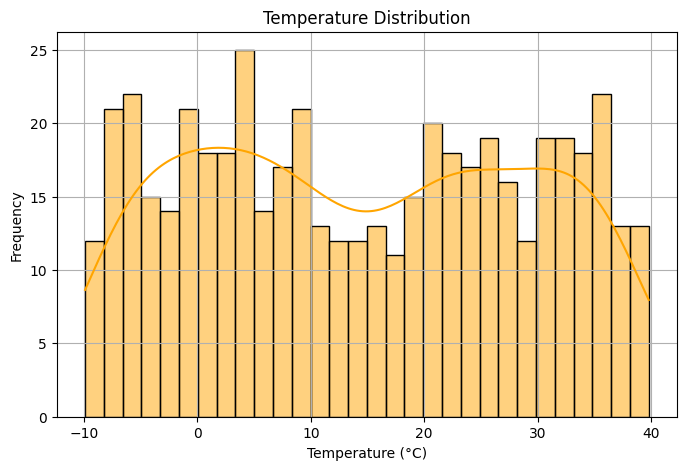

In [ ]:
#Temperature Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Temperature (C)"], bins=30, kde=True, color='orange')
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

C:\Users\nstiw\AppData\Local\Temp\ipykernel_14464\3518048957.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Weather Condition", order=df["Weather Condition"].value_counts().index, palette='coolwarm')


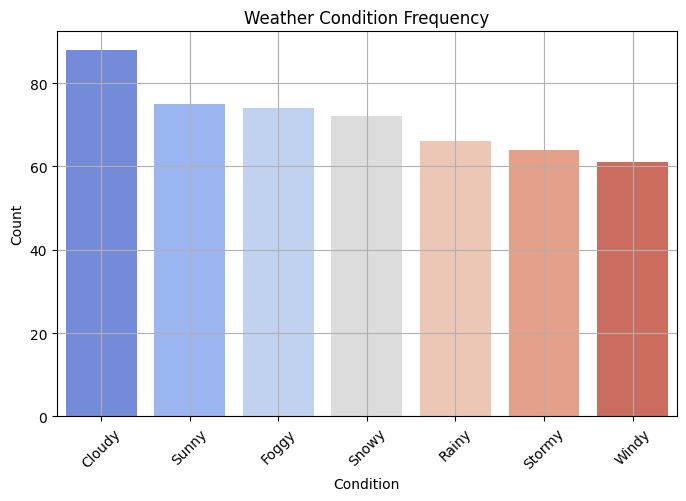

In [ ]:
#Weather Condition Counts
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Weather Condition", order=df["Weather Condition"].value_counts().index, palette='coolwarm')
plt.title("Weather Condition Frequency")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\nstiw\AppData\Local\Temp\ipykernel_14464\3506169698.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Weather Condition", y="Temperature (C)", palette="Set2")


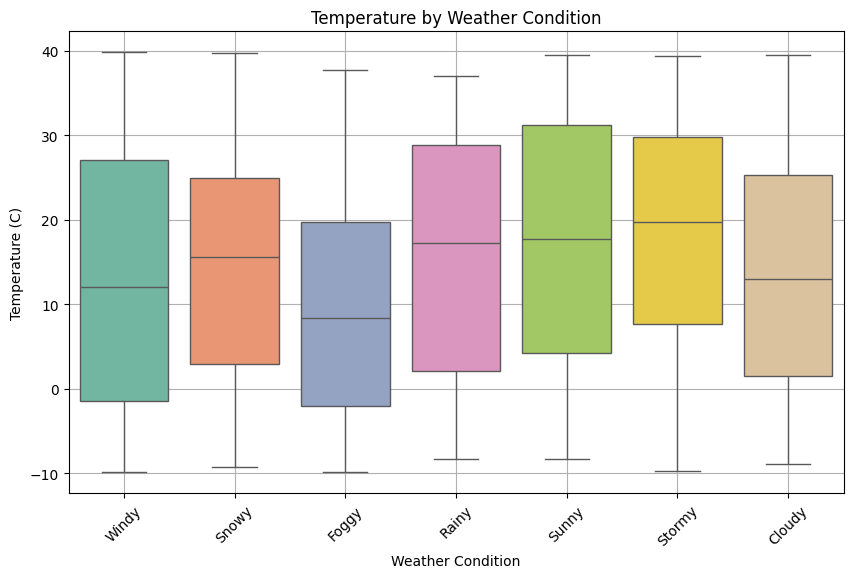

In [ ]:
#Temperature by Weather Condition
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Weather Condition", y="Temperature (C)", palette="Set2")
plt.title("Temperature by Weather Condition")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

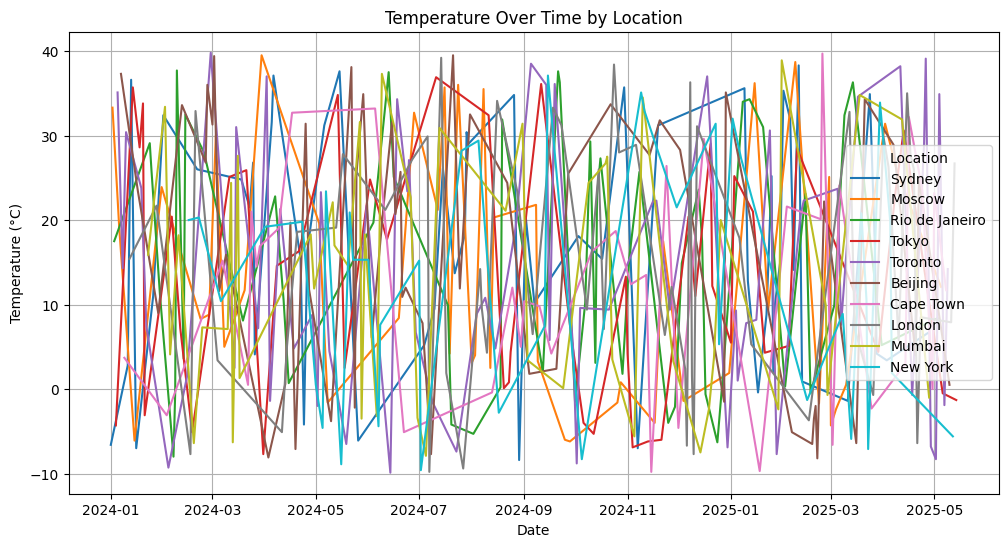

In [ ]:
#Time Series Plot: Temperature Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Temperature (C)", hue="Location", palette="tab10")
plt.title("Temperature Over Time by Location")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

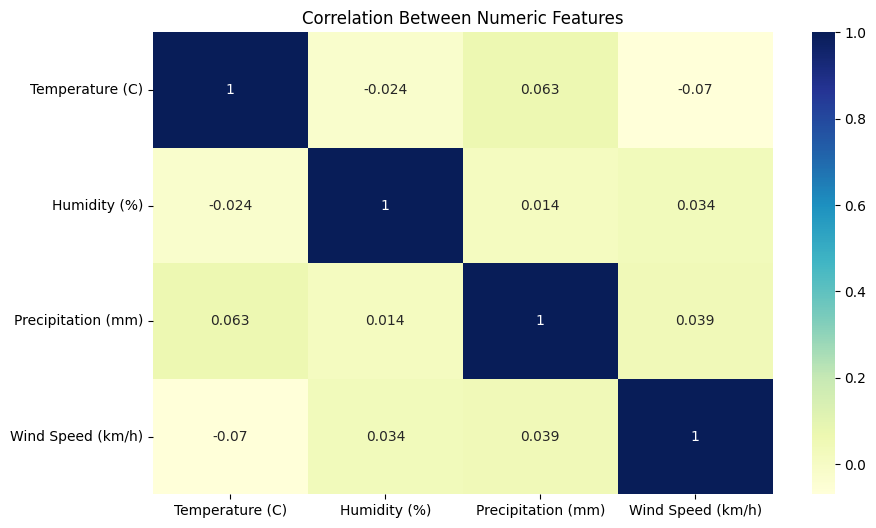

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.title("Correlation Between Numeric Features")
plt.show()

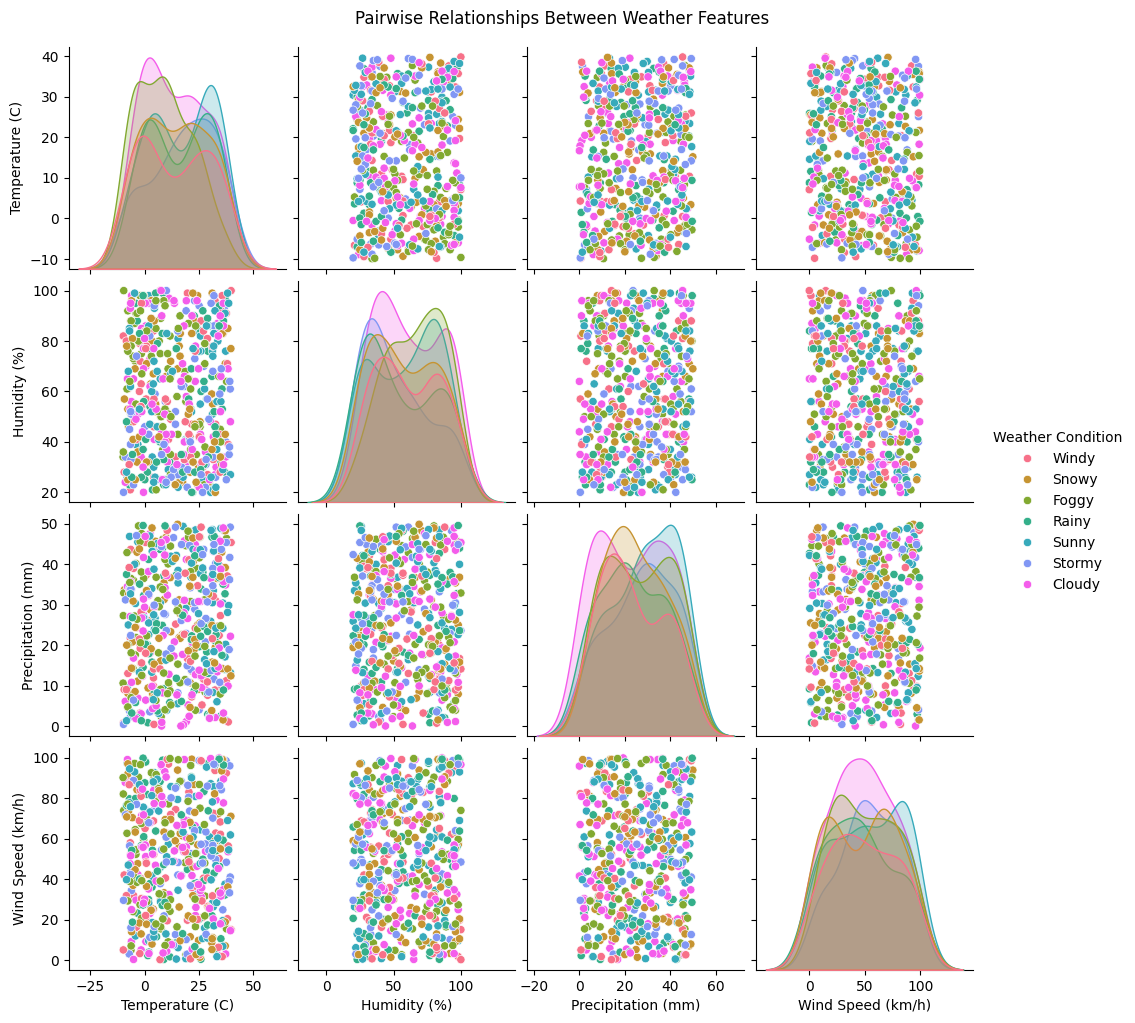

In [ ]:
# Pairplot to show relationships between numeric features
sns.pairplot(df, hue="Weather Condition", diag_kind='kde', palette="husl")
plt.suptitle("Pairwise Relationships Between Weather Features", y=1.02)
plt.show()

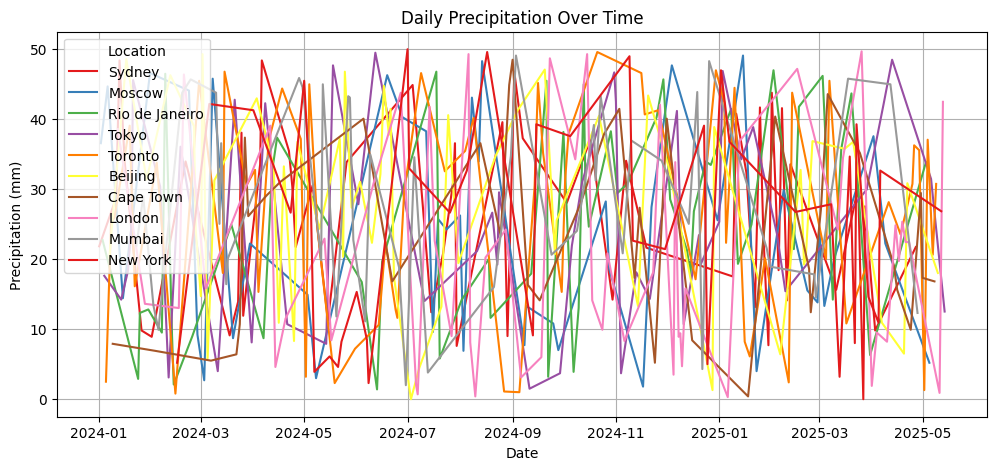

In [ ]:
#Precipitation changes daily across different locations
plt.figure(figsize=(12, 5))
sns.lineplot(x='Date', y='Precipitation (mm)', data=df, hue='Location', palette='Set1')
plt.title("Daily Precipitation Over Time")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.grid(True)
plt.show()

In [ ]:
# Top hottest days
print("Top 5 Hottest Days:")
print(df.sort_values(by="Temperature (C)", ascending=False).head(5))

# Coldest days
print("Top 5 Coldest Days:")
print(df.sort_values(by="Temperature (C)").head(5))

Top 5 Hottest Days:
          Date   Location  Temperature (C)  Humidity (%)  Precipitation (mm)  \
59  2024-02-29    Toronto             39.8           100                45.4   
420 2025-02-24  Cape Town             39.7            77                12.4   
202 2024-07-21    Beijing             39.5            27                13.2   
89  2024-03-30     Moscow             39.5            48                22.2   
61  2024-03-02    Beijing             39.4            61                49.2   

     Wind Speed (km/h) Weather Condition  
59                15.0             Windy  
420               71.0             Snowy  
202               61.8             Sunny  
89                14.5            Cloudy  
61                41.0            Stormy  
Top 5 Coldest Days:
          Date   Location  Temperature (C)  Humidity (%)  Precipitation (mm)  \
165 2024-06-14    Toronto             -9.9            34                10.6   
319 2024-11-15  Cape Town             -9.8            36     

C:\Users\nstiw\AppData\Local\Temp\ipykernel_14464\2978005848.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Weather Condition", y="Wind Speed (km/h)", data=df, palette="muted")


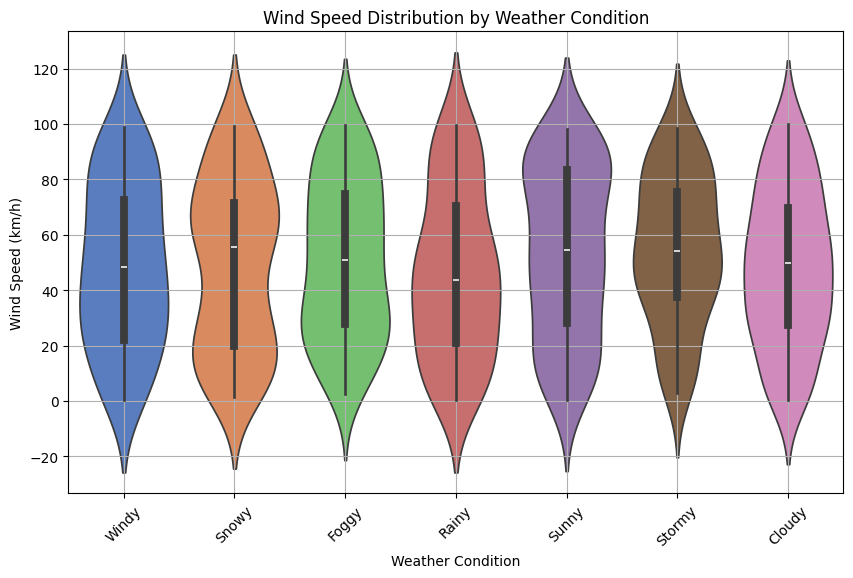

In [ ]:
#Showing the distribution of wind speeds for different weather conditions
plt.figure(figsize=(10, 6))
sns.violinplot(x="Weather Condition", y="Wind Speed (km/h)", data=df, palette="muted")
plt.title("Wind Speed Distribution by Weather Condition")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()